In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib notebook
rcParams["image.cmap"] = 'magma'

In [2]:
density_grids = []

In [3]:
grid_len = 151
for i in range(8):
    dens_grid = np.fromfile("density_grid.{}".format(i), dtype=np.float32, count=grid_len**3)
    density_grids.append(dens_grid.reshape([grid_len,grid_len,grid_len]))

In [4]:
density_grid = np.array(density_grids).sum(0)
density_grid.shape

(151, 151, 151)

In [5]:
density_grid[:,:,0] += density_grid[:,:,150]
density_grid[:,0,:] += density_grid[:,150,:]
density_grid[0,:,:] += density_grid[150,:,:]

In [6]:
density_grid = density_grid[:-1,:-1,:-1]
density_grid.shape

(150, 150, 150)

In [7]:
density_mean = density_grid.sum()/density_grid.size

In [8]:
delta = density_grid/density_mean - 1

In [9]:
log10_delta_plus_1 = np.log10(1 + delta)

In [10]:
log10_density_grid = np.log10(density_grid)

<IPython.core.display.Javascript object>


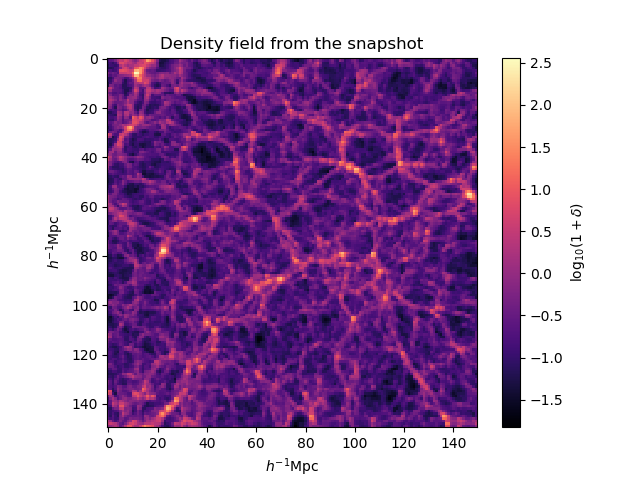

Text(0, 0.5, '$h^{-1}$Mpc')

In [11]:
fig1, ax1 = plt.subplots(dpi=100)
im1 = ax1.imshow(log10_delta_plus_1[:,:,10])#,cmap='inferno')
cb1 = fig1.colorbar(im1,ax=ax1)
cb1.set_label("$\log_{10}(1+\delta)$")
ax1.set_title("Density field from the snapshot")
ax1.set_xlabel("$h^{-1}$Mpc")
ax1.set_ylabel("$h^{-1}$Mpc")

<IPython.core.display.Javascript object>


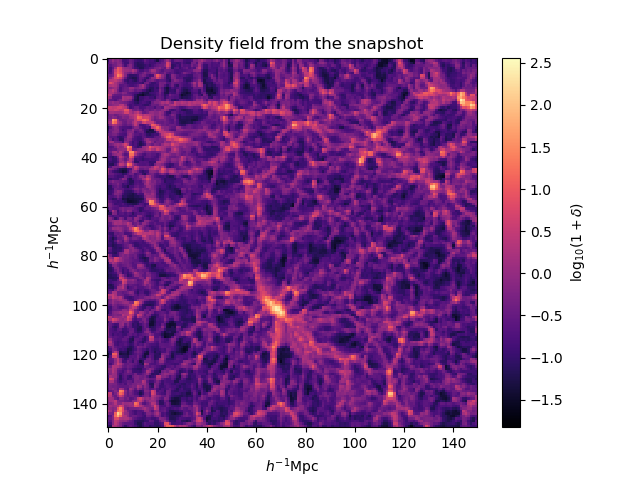

interactive(children=(IntSlider(value=74, description='third_direction', max=149), Output()), _dom_classes=('w…

In [12]:
# Jupyter based interaction
from ipywidgets import interact
fig2, ax2 = plt.subplots(dpi=100)
im2 = ax2.imshow(log10_delta_plus_1[:,:,10])
cb2 = fig2.colorbar(im2,ax=ax2)
cb2.set_label("$\log_{10}(1+\delta)$")
ax2.set_title("Density field from the snapshot")
ax2.set_xlabel("$h^{-1}$Mpc")
ax2.set_ylabel("$h^{-1}$Mpc")
@interact(third_direction=(0,149))
def show2D(third_direction):
    im2.set_data(log10_delta_plus_1[:,:,int(third_direction)])

<IPython.core.display.Javascript object>


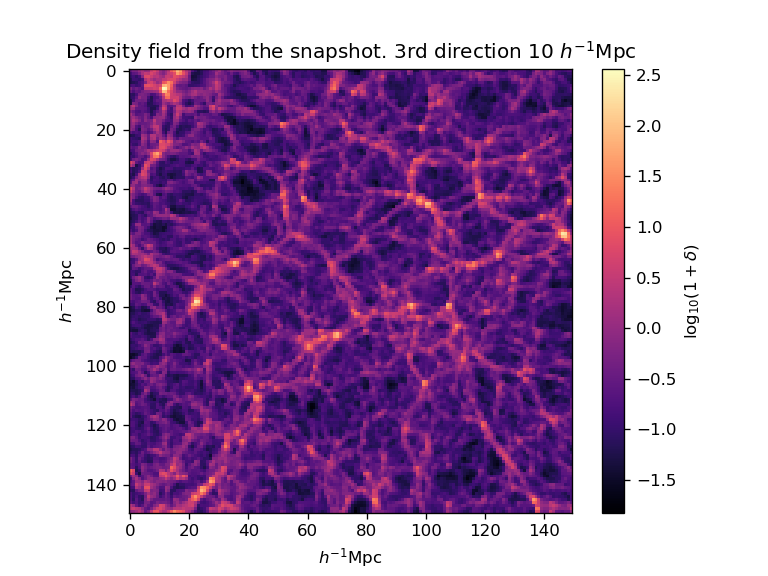

In [14]:
# %%capture 
# Just to hide the output of this cell
# Matplotlib animation save to gif
import time
import matplotlib.animation
# %matplotlib inline
# plt.ioff()

fig3, ax3 = plt.subplots(dpi=120);
im3 = ax3.imshow(log10_delta_plus_1[:,:,10]);
cb3 = fig3.colorbar(im3,ax=ax3);
cb3.set_label("$\log_{10}(1+\delta)$");
ax3.set_title("Density field from the snapshot");
ax3.set_xlabel("$h^{-1}$Mpc");
ax3.set_ylabel("$h^{-1}$Mpc");

def show2D(third_direction):
    im3.set_data(log10_delta_plus_1[:,:,int(third_direction)]);
    ax3.set_title("Density field from the snapshot. 3rd direction %i $h^{-1}$Mpc"%third_direction);
# for third_direction in range(151):
#     show2D(third_direction)
#     time.sleep(.5) 
#     plt.show()
#     clear_output(wait=True)
anim = matplotlib.animation.FuncAnimation(fig3, show2D, frames=150, interval=200);

In [15]:
anim.save("animated.gif", writer="imagemagick")
print("saved")

saved


# Displaying the created gif
![](animated.gif)

In [24]:
anim.save("animated.mp4",writer='ffmpeg')

In [22]:
# from IPython.display import Video
# Video("animated.mp4")

In [14]:
# %matplotlib notebook

In [15]:
from gaussian_random_field.random_fields import GaussianRandomField

In [16]:
density_field = GaussianRandomField()
density_field.set_field(log10_delta_plus_1)

<IPython.core.display.Javascript object>


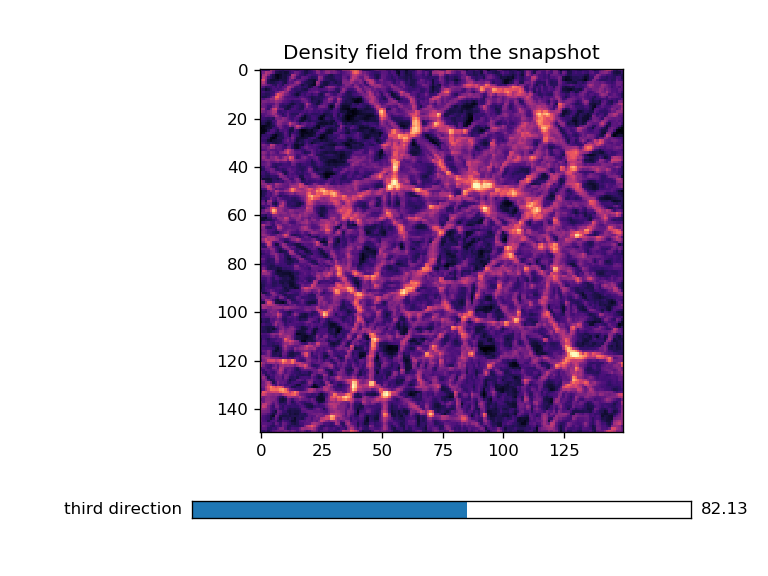

In [17]:
density_field.visualise(title="Density field from the snapshot")